## Convergence to theoretical distribution using Hellinger distance

### Data Hellinger distance vs. time

In [1]:
using PyPlot
using PyCall
@pyimport matplotlib as mpl
mpl.style[:use]("classic")

In [7]:
filename = "hellig3cHO"
data = readdlm("../poincaredata/sectionsandtrajectories/$filename");
t = data[:,1]
h = data[:,2];

In [8]:
filename = "hellX4v7MH"
data = readdlm("../poincaredata/sectionsandtrajectories/$filename");
h1 = data[:,2];

In [9]:
filename = "hell0F7YQP"
data = readdlm("../poincaredata/sectionsandtrajectories/$filename");
h2 = data[:,2];

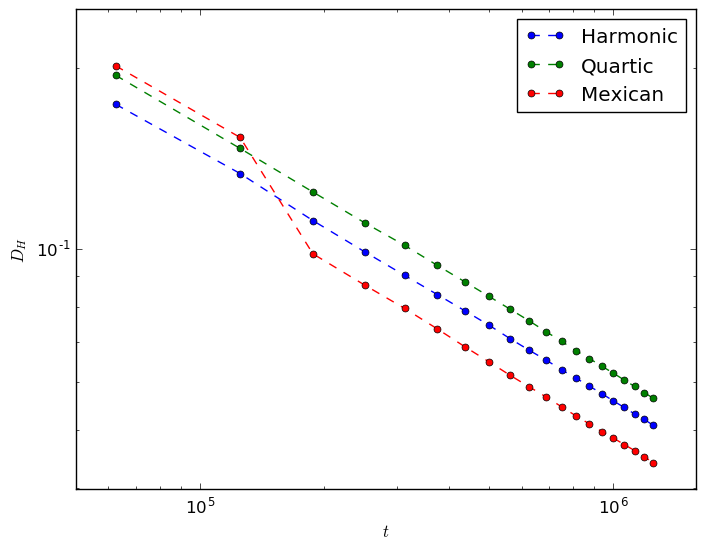

In [10]:
fig = plt[:figure]()
ax = fig[:add_subplot](1,1,1)

ax[:set_xscale]("log")
ax[:set_yscale]("log")

a = ax[:plot](t, h, "o--", ms = 5.0, label = "Harmonic" )
b = ax[:plot](t, h2, "o--", ms = 5.0, label = "Quartic" )
c = ax[:plot](t, h1, "o--", ms = 5.0, label = "Mexican" )


ax[:set_xlim](10^4.7,10^6.2)
ax[:set_ylim](10^-1.4, 10^-0.6)
ax[:set_xlabel](L"t")
ax[:set_ylabel](L"D_H")
#ax[:ticklabel_format](style="sci", axis="x" , scilimits = (0,0))
handles, labels = ax[:get_legend_handles_labels]()
ax[:legend](handles, labels)
plt[:savefig]("../plots/hellinger.pdf")



### Linear Regression

In [11]:
using LsqFit

We consider that the convergence is of the form 
$$ D_H = \beta t^{-\alpha} \, .$$
Then
$$\log(D_H) = -\alpha \log(t) + \log(\beta) $$

In [12]:
model(x, p) = p[1]*x + p[2]

model (generic function with 1 method)

In [15]:
fit = curve_fit(model, log(10,t)[3:end], log(10,h)[3:end], [1.0,1.0])
fit1 = curve_fit(model, log(10,t)[3:end], log(10,h1)[3:end], [1.0,1.0])
fit2 = curve_fit(model, log(10,t)[3:end], log(10,h2)[3:end], [1.0,1.0]);


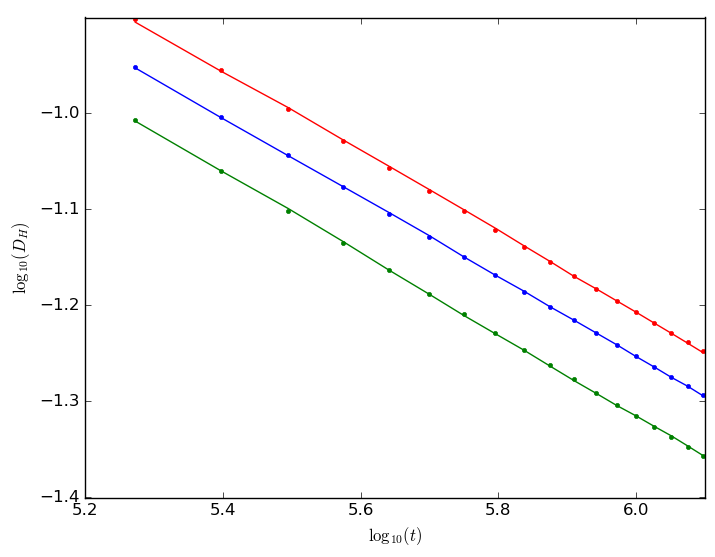

PyObject <matplotlib.text.Text object at 0x7ff4b35b83d0>

In [16]:
plot(log(10,t)[3:end], log(10,h)[3:end])
plot(log(10,t)[3:end], model(log(10,t)[3:end], fit.param), "b.")

plot(log(10,t)[3:end], log(10,h1)[3:end])
plot(log(10,t)[3:end], model(log(10,t)[3:end], fit1.param), "g.")

plot(log(10,t)[3:end], log(10,h2)[3:end])
plot(log(10,t)[3:end], model(log(10,t)[3:end], fit2.param), "r.")

plt[:xlabel](L"\log_{10}(t)")
plt[:ylabel](L"\log_{10}(D_H)")

In [17]:
## Slopes of the straight lines (-alpha)
fit.param[1], fit1.param[1], fit2.param[1]

(-0.414277,-0.424207,-0.419243)

In [18]:
## Intercepts (beta)
fit.param[2], fit1.param[2], fit2.param[2]

(1.23273,1.22991,1.30869)

## Hellinger applied to marginal distributions

In [21]:
filename = "histig3cHO"
data = readdlm("../data/$filename");

In [2]:
using Distances
using StatsBase

In [50]:
q = data[:,1]
p = data[:,3]
z = data[:,5];

In [126]:
"""This function takes as arguments a vector with the experimental data (x), a type of distribution
associated to this vector and an approximated number of bins. It returns the experimental histogram 
together with the value of the  theoretical distribution calculated for the central points inside each bin"""
function rhos(x::Vector{Float64}, distribution::AbstractString, n_bins::Int64)
    beta = 1.0
    Q = 0.1
    
    freq_exp = StatsBase.fit(Histogram, x, nbins = n_bins)
    edges = freq_exp.edges
    step_x = step(edges[1])
    hist_exp = freq_exp.weights/(sum(freq_exp.weights*step_x))
    
    xrange = edges[1][1]+step_x/2.:step_x:edges[1][end]-step_x/2.
    
    if distribution=="gaussian"
        hist_theor = Float64[sqrt(beta/(2.*pi))*exp(-beta*i.^2/2.) for i in xrange]
    elseif distribution=="logistic"
        hist_theor = Float64[exp(i/Q)./(Q*(1.+ exp(i/Q)).^2) for i in xrange]
    end
    
    hist_exp, hist_theor
    
end   

rhos

In [127]:
rhoq_exp, rhoq_theor =  rhos(q, "gaussian",100);
rhop_exp, rhop_theor =  rhos(p, "gaussian",100);
rhoz_exp, rhoz_theor =  rhos(z, "logistic",100);


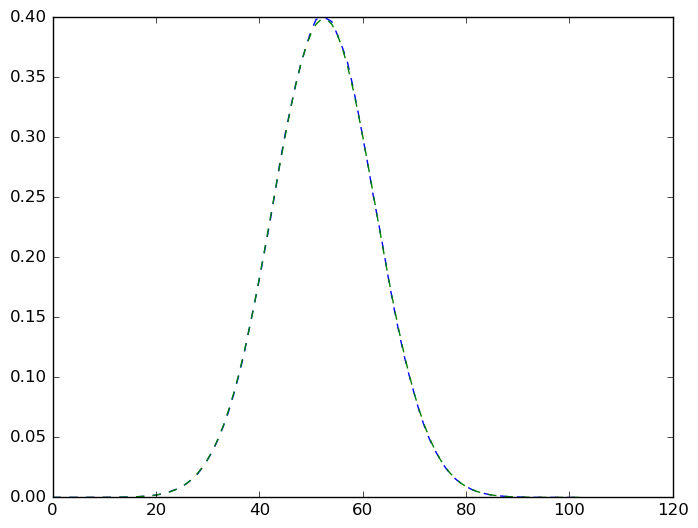

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff48c4a6ad0>

In [128]:
## Visual  comparison between the theoretical and the experimental distribution of q
plot(rhoq_exp, "b--")
plot(rhoq_theor, "g--")

In [15]:
"""Hellinger distance for two multivariate distributions x and y"""
function myHellinger{T, N}(x::Array{T,N}, y::Array{T,N})
        sqrt(1. - sum(sqrt(x .* y) / sqrt(sum(x) * sum(y))))
end

myHellinger

In [132]:
##Function included in Module Distances (Defined only for vectors)
hellinger(rhoq_exp, rhoq_theor), hellinger(rhop_exp, rhop_theor), hellinger(rhoz_exp, rhoz_theor)

(0.0024216,0.0019096,0.00315617)

In [133]:
# Our function that may be extended for multivariate distributions
myHellinger(rhoq_exp, rhoq_theor), myHellinger(rhop_exp, rhop_theor), myHellinger(rhoz_exp, rhoz_theor)

(0.0024216,0.0019096,0.00315617)

Before leaving this part let's compare two different distributions throug Hellinger distance

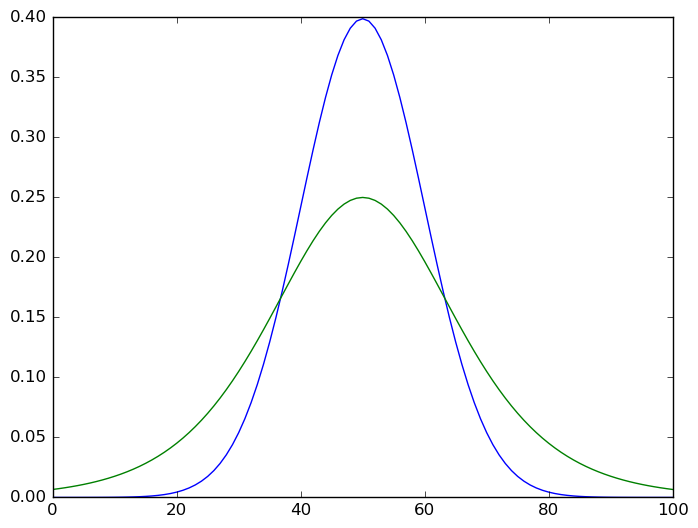

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff48c19fb10>

In [141]:
gaussian = Float64[sqrt(1./(2.*pi))*exp(-i.^2/2.) for i in -5:0.1:5.];
logistic = Float64[exp(i)./((1.+ exp(i)).^2) for i in -5:0.1:5.];
plot(gaussian)
plot(logistic)

In [144]:
hellinger(gaussian, logistic), myHellinger(gaussian, logistic) # >> 0.05

(0.244636,0.244636)

## Contribution to the Hellinger distance of the central and peripherical 3D points

In [4]:
using HDF5
file = h5open("../poincaredata/sectionsandtrajectories/ig3cHO.hdf5","r")

HDF5 data file: ../poincaredata/sectionsandtrajectories/ig3cHO.hdf5

In [5]:
data = read(file["trajectory"]);

In [6]:
t = data[:,1][1:10:end]
q = data[:,2][1:10:end]
p = data[:,3][1:10:end]
z = data[:,4][1:10:end]
Q = 0.1
beta = 1.;

In [7]:
"""Join 3d distribution for the Harmonic Oscillator"""
function jointdistribution(q::Float64,p::Float64, z::Float64)
    rhoq =  sqrt(beta/(2.*pi))*exp(-beta*q.^2./2.)
    rhop = sqrt(beta/(2.*pi))*exp(-beta*p.^2/2.)
   rhoz = exp(z/Q)./(Q*(1.+ exp(z/Q)).^2)
    rhoq*rhop*rhoz
end

jointdistribution (generic function with 1 method)

In [8]:
freq_exp = StatsBase.fit(Histogram, (q,p,z), nbins = 100); ##Approximate number of bins in each direction
edges = freq_exp.edges
step_x = step(edges[1])
step_y = step(edges[2])
step_z = step(edges[3]);

In [9]:
hist_exp = freq_exp.weights/(sum(freq_exp.weights*step_x*step_y*step_z));

In [10]:
size(hist_exp), length(hist_exp)  ##Number of boxes arranged in an array of dimension 3

((103,111,69),788877)

In [11]:
## Range of values explored by the trajectory in the phase space
qrange = edges[1][1]+step_x/2.:step_x:edges[1][end]-step_x/2.
prange = edges[2][1]+step_y/2.:step_y:edges[2][end]-step_y/2.
zrange = edges[3][1]+step_z/2.:step_z:edges[3][end]-step_z/2.
qrange, prange, zrange

(-5.25:0.1:4.95,-5.45:0.1:5.55,-1.675:0.05:1.725)

In [12]:
##Theoretical value of the distribution in the middle point of the box 
hist_theor = Float64[jointdistribution(x,y,z) for x in qrange, y in prange, z in zrange];

In [63]:
##Total distance between the two distributions (reported in the draft as the final distance)
myHellinger(hist_exp, hist_theor)

0.05081899409530904

In [17]:
##Let's analyze the contribution of the different arrays

In [27]:
##Points farther from z = 0
myHellinger(hist_exp[:,:,1], hist_theor[:,:,1])  ##In these arrays there are few points 

0.9877813592508071

In [32]:
size(hist_theor), length(hist_theor)

((103,111,69),788877)

In [48]:
##Let's moving from the boxes in z= -1.675 to the boxes in z = 1.675 calculating the accumulated distance for each stack
distance_z = zeros(size(hist_exp)[3])
for k in 1:size(hist_exp)[3]
    distance_z[k] += myHellinger(hist_exp[:,:,1:k], hist_theor[:,:,1:k])
end

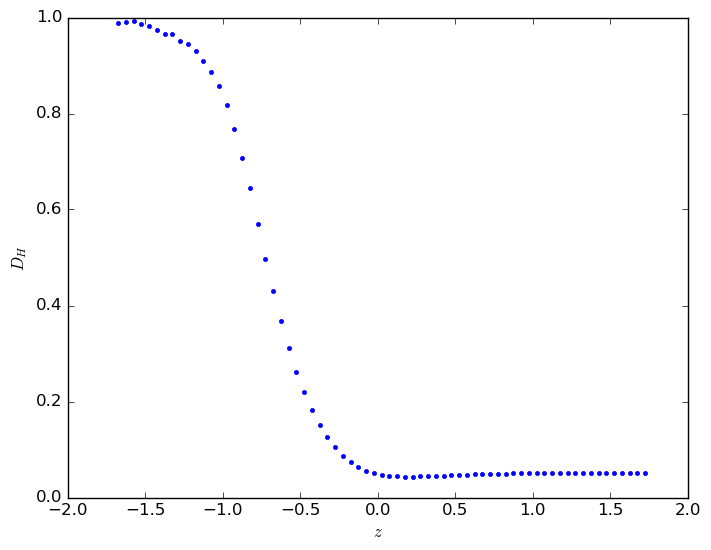

PyObject <matplotlib.text.Text object at 0x7fa819ef8290>

In [61]:
plot(zrange,distance_z, ".")
plt[:ylabel](L"D_H")
plt[:xlabel](L"z")

In [59]:
##The same calculation for the q-range
distance_q = zeros(size(hist_exp)[1])
for k in 1:size(hist_exp)[1]
    distance_q[k] += myHellinger(hist_exp[1:k,:,:], hist_theor[1:k,:,:])
end

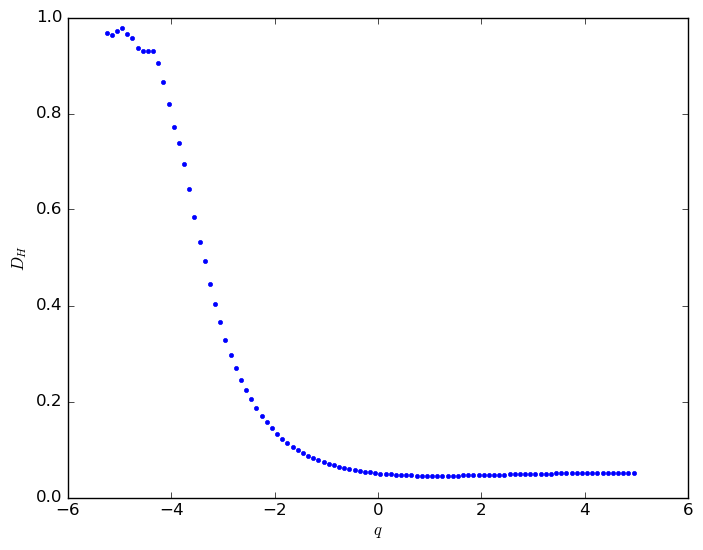

PyObject <matplotlib.text.Text object at 0x7fa819e5a290>

In [62]:
plot(qrange,distance_q, ".")
plt[:ylabel](L"D_H")
plt[:xlabel](L"q")